# Image segementation Object Detection


## Description

The technology of image segmentation is widely used in medical image processing, face recognition pedestrian detection self driving cars and more, in this chapter you will create object detection model using **Convolutional Neural Network** for **self-driving car** application that prevents the car from oversteering and under steering also avoiding the other cars as well as the pedestrian's. At the end of this chapter you will be comfortable with Convolutional Neural Network how to design, tune create your own API Model.
## Overview

- declaring the problem and the needs for the autonomous cars.
- introduction of convolutional neural network model
- intution of how to tune the parameters 
- the dataset that used in this project 



## Pre-requisite

- tensorflow
- Python (along with NumPy and pandas libraries)
- Basic statistics (knowledge of central tendancy)



## Learning Outcomes

- Validating convolutional Neural network parameters
- running a complex algorithms like gradient with single line of code (using Tensorflow)
- Understanding how to create your own dataset and train it from scratch
  

## Chapter 1: what is Neural Networks and how it can be more accurate? 

### Description: In this chapter you will be introduced to Neural Networks 

## Chapter 2: Introduction to convlutional Neural Networks? 

### Description: In this chapter you will be introduced to convlutional Neural Networks  

## Chapter 3: Problem statement and the importance of Self-Driving cars  ? 

### Description: In this chapter we will going in deep with the problem of self driving car applications, what is the challanges for such application, how can this application affects on the real world, finaly you will learn how you can solve this problem using Neural Networks 

## Chapter 4: the dataset used in Self-Driving car? 

### Description: In this chapter you will be introduced to the dataset used in this project and how this dataset created by the researchers, Also you will be given the intution of how to build a similar dataset by your own 

## Chapter 5: Building the CNN Architecture model for Self-Driving car? 

### Description: In this chapter you will learn the building block and the Architecture for our project, you will be given how to design each layer, explaining each step programmed with tensorflow  

## Chapter 6: Train the model? 

### Description: In this chapter you will learn how to train your model, and how to tune the parameters of the model, giving the details of the algorithms that used in the optimization funtions, activation functions and more, you will learn this steps programmed with tensorflow 

## Chapter 7: Running the Model ? 

### Description: In this chapter you are finally ready for running your trained model, you will be given, a three examples, running on images, on videos recoreded and on live stream camera

## Chapter 7: Running the Model ? 

### Description: In this chapter you are finally ready for running your trained model, you will be given, a three examples, running on images, on videos recoreded and on live stream camera

### 7.1 : Importing the requried Libraries 

now in this section from this chapter we will introduce you the reqirued libraries that used in this project, and exaplianing the usage of each library 
**import tensorflow as tf**

**from tensorflow.contrib.layers import flatten**
tensorflow is the most common libraries that used in machine/deeplearning, this library contains alot of algorithms that used in machine/deep learning, dealing with complex algorithms with just single line of code.


**import scipy.misc**

**from scipy.misc import imresize**
scipy is a collection of numerical algorithms and domain-specific toolboxes, including signal processing, optimization, statistics

**import model**


**from subprocess import call**


**import numpy as np**

**from numpy import array**


**from skimage.transform import resize**


**from imageio import imread **


**import matplotlib as plt**

**import matplotlib.pyplot as plt**

**%matplotlib inline**

**import matplotlib.gridspec as gridspec**

matplotlib popular plotting package, that provides publication-quality 2D plotting as well as rudimentary 3D plotting



**import random**

random is a  module implements pseudo-random number generators for various distributions.

**import cv2**

open cv is an Open Source Computer Vision library, opencv is designed for computational efficiency and with a strong focus on real-time applications

**import csv**

CSV (Comma Separated Values) format is the most common import and export format for spreadsheets and databases


**from sklearn.model_selection import train_test_split**

**from sklearn.utils import shuffle**

Simple and efficient tools for data mining and data analysis, Built on NumPy, SciPy, and matplotlib


**import time**

its for determinting the time 


**import pickle**

 module implements binary protocols for serializing and de-serializing a Python object structure


In [10]:
import tensorflow as tf
import scipy.misc
import model
import cv2
from subprocess import call
import numpy as np
from skimage.transform import resize
from scipy.misc import imresize
from imageio import imread
import matplotlib as plt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random 
import cv2
from tensorflow.contrib.layers import flatten
import tensorflow as tf
import csv
from numpy import array
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import time
import matplotlib.gridspec as gridspec
import cv2
import pickle

### 7.2 Import the saved model from the directory 


**sess = tf.InteractiveSession()**

**saver = tf.train.Saver()**
**saver.restore(sess, "save/model.ckpt")**

search on the file that contains the model saved for example, try to save your ,model in an empty folder.

(//:C//user//desktop//save/model.ckpt)



In [11]:
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, "save/model.ckpt")


C:\Users\El Holandy\AppData\Roaming\Python\Python36\site-packages\tensorflow\python\client\session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


INFO:tensorflow:Restoring parameters from save/model.ckpt


### 7.3
 
 
img = cv2.imread('steering_wheel_image.jpg',0)

rows,cols = img.shape


plt.imshow(img)
displaying the image 
plt.title('Sample Gray Image')
plt.show()
smoothed_angle = 0


### Instructions
- here we will load the GUI stearing image 
- convert the image Gray scale by putting 0  
- getting the the image shape rows and cols
- dislplay the image 
- initialize the angle stearing with zero

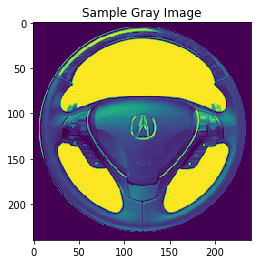

In [12]:

img = cv2.imread('steering_wheel_image.jpg',0)
rows,cols = img.shape
plt.imshow(img)
plt.title('Sample Gray Image')
plt.show()
smoothed_angle = 0

### 7.4 Video live stream Version 

### Instructions
- open the web camera if you attached more than one camera then choose the number of the camera
- start a while loop until the you pressed trigger to exit the run we attatched this trigger with q 
-  load the frame and resize it to the recommended dimensions 
- run the model and evaluate it, for example we have an input X and output Y, Y is the predicted angle degree, so we will map the X model the ( input ) with the input image ( or in our case here ( the input frame ), and the degrees is the requried output or the predeicted Y
- convert the degree from radian to degree
- make smooth angle transitions by turning the steering wheel based on the difference of the current angle and the predicted angle, it can be done by the "cv2.getRotationMAtrix2D " that can be done from opencv library 
- dispaly the stearing wheel GUI 


In [5]:

cap = cv2.VideoCapture(0)
while(cv2.waitKey(10) != ord('q')):
    ret, frame = cap.read()
    image = scipy.misc.imresize(frame, [66, 200]) / 255.0
    degrees = model.y.eval(feed_dict={model.x: [image], model.keep_prob: 1.0})[0][0] * 180 / scipy.pi
    call("clear")
    print("Predicted steering angle: " + str(degrees) + " degrees")
    cv2.imshow('frame', frame)
    #make smooth angle transitions by turning the steering wheel based on the difference of the current angle
    #and the predicted angle
    smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow("steering wheel", dst)

cap.release()
cv2.destroyAllWindows()


### 7.4 Video Version 

### Instructions
- load the video that in the your directory 
- start a while loop until the you pressed trigger to exit the run we attatched this trigger with q 
-  load the frame and resize it to the recommended dimensions 
- run the model and evaluate it, for example we have an input X and output Y, Y is the predicted angle degree, so we will map the X model the ( input ) with the input image ( or in our case here ( the input frame ), and the degrees is the requried output or the predeicted Y
- convert the degree from radian to degree
- make smooth angle transitions by turning the steering wheel based on the difference of the current angle and the predicted angle, it can be done by the "cv2.getRotationMAtrix2D " that can be done from opencv library 
- dispaly the stearing wheel GUI 

In [14]:

cap = cap = cv2.VideoCapture('11.mp4')


In [15]:

while cap.isOpened():
    ret, frame = cap.read()
    #################################____________________Converting the Image to HSV and MASKING the image ______________________#####################################


    
    image = scipy.misc.imresize(frame, [66, 200]) / 255.0
    degrees = model.y.eval(feed_dict={model.x: [image], model.keep_prob: 1.0})[0][0] * 180 / scipy.pi
# #     call("clear")
    print("Predicted steering angle: " + str(degrees) + " degrees")
    cv2.imshow('frame', frame)

    smoothed_angle += 0.2 * pow(abs((degrees - smoothed_angle)), 2.0 / 3.0) * (degrees - smoothed_angle) / abs(degrees - smoothed_angle)
    M = cv2.getRotationMatrix2D((cols/2,rows/2),-smoothed_angle,1)
    dst = cv2.warpAffine(img,M,(cols,rows))
    cv2.imshow("steering wheel", dst)

    if cv2.waitKey(10) & 0xFF == ord('q'):
        break

cap.release()

E:\Softwares\Anaconda\Anaconda\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


Predicted steering angle: 0.872069802047354 degrees
Predicted steering angle: 0.984799833142593 degrees
Predicted steering angle: 1.3888279341070613 degrees
Predicted steering angle: 1.9488574489929151 degrees
Predicted steering angle: 2.192561586786732 degrees
Predicted steering angle: 2.1883285770486167 degrees
Predicted steering angle: 2.080355452545174 degrees
Predicted steering angle: 2.096049519710571 degrees
Predicted steering angle: 2.189959925043192 degrees
Predicted steering angle: 2.47788804360896 degrees
Predicted steering angle: 2.5671475170036255 degrees
Predicted steering angle: 2.45918079580253 degrees
Predicted steering angle: 2.490299137661108 degrees
Predicted steering angle: 2.5619390708746677 degrees
Predicted steering angle: 2.6258068891429875 degrees
Predicted steering angle: 2.763145771652665 degrees
Predicted steering angle: 3.0050697913940474 degrees
Predicted steering angle: 3.027783158592102 degrees
Predicted steering angle: 2.838957456345222 degrees
Predict

Predicted steering angle: -10.206111766355457 degrees
Predicted steering angle: -10.008906275770618 degrees
Predicted steering angle: -10.233891853257191 degrees
Predicted steering angle: -10.247402821209123 degrees
Predicted steering angle: -10.503511863196152 degrees
Predicted steering angle: -10.464438912275448 degrees
Predicted steering angle: -10.536519606133885 degrees
Predicted steering angle: -10.505507985981088 degrees
Predicted steering angle: -2.9421821052716246 degrees
Predicted steering angle: -18.31540326884119 degrees
Predicted steering angle: -10.379852995820364 degrees
Predicted steering angle: -10.401730091731915 degrees
Predicted steering angle: -10.45349865677238 degrees
Predicted steering angle: -10.47902221992707 degrees
Predicted steering angle: -10.64735820843756 degrees
Predicted steering angle: -10.897562551887113 degrees
Predicted steering angle: -10.819471291559065 degrees
Predicted steering angle: -10.757033117261393 degrees
Predicted steering angle: -10.87

Predicted steering angle: -5.7389225892438205 degrees
Predicted steering angle: -17.9671865645756 degrees
Predicted steering angle: -11.200606946303177 degrees
Predicted steering angle: -21.525926858016515 degrees
Predicted steering angle: -24.968796407282746 degrees
Predicted steering angle: -29.159020132889896 degrees
Predicted steering angle: -32.21982597545854 degrees
Predicted steering angle: -23.032856126670794 degrees
Predicted steering angle: -20.83730889344312 degrees
Predicted steering angle: -22.077290463671208 degrees
Predicted steering angle: -21.68575328459481 degrees
Predicted steering angle: -21.34367350529848 degrees
Predicted steering angle: -7.533717437544282 degrees
Predicted steering angle: -10.66908760150831 degrees
Predicted steering angle: -6.898087653665025 degrees
Predicted steering angle: -4.063379428757197 degrees
Predicted steering angle: -1.8463057871431703 degrees
Predicted steering angle: -1.646409628912169 degrees
Predicted steering angle: -3.4679393317

Predicted steering angle: -4.502590047579813 degrees
Predicted steering angle: -3.6759271296912917 degrees
Predicted steering angle: -1.5828716874364195 degrees
Predicted steering angle: -4.124599694948491 degrees
Predicted steering angle: -0.4699818483331395 degrees
Predicted steering angle: -1.1465754249552838 degrees
Predicted steering angle: -1.263263123787722 degrees
Predicted steering angle: -1.105882545262523 degrees
Predicted steering angle: 0.9486604484704093 degrees
Predicted steering angle: 1.7724753909184463 degrees
Predicted steering angle: 0.524168513783201 degrees
Predicted steering angle: 0.4991684205953676 degrees
Predicted steering angle: -0.6299479736243058 degrees
Predicted steering angle: 0.784840495661769 degrees
Predicted steering angle: 1.006159222059398 degrees
Predicted steering angle: 1.8607403247369343 degrees
Predicted steering angle: 3.0313275998845155 degrees
Predicted steering angle: 2.506645061005418 degrees
Predicted steering angle: 1.9760497127392052 

Predicted steering angle: -1.9751743813083857 degrees
Predicted steering angle: -1.3060395313424542 degrees
Predicted steering angle: -0.8326664940864033 degrees
Predicted steering angle: -0.7886370669840913 degrees
Predicted steering angle: -0.9329550688041996 degrees
Predicted steering angle: -1.7962123259966505 degrees
Predicted steering angle: -2.4671193966087888 degrees
Predicted steering angle: -3.2241192941616457 degrees
Predicted steering angle: -3.00491440459043 degrees
Predicted steering angle: -3.011651105546178 degrees
Predicted steering angle: -1.6381724207731336 degrees
Predicted steering angle: -0.9205240177930707 degrees
Predicted steering angle: -0.9936677665627968 degrees
Predicted steering angle: -1.5558547674527283 degrees
Predicted steering angle: -1.765237204667231 degrees
Predicted steering angle: 0.14166659442146085 degrees
Predicted steering angle: -0.4878057605808167 degrees
Predicted steering angle: -0.8514049579917746 degrees
Predicted steering angle: -0.655

Predicted steering angle: -55.933371924623636 degrees
Predicted steering angle: -67.40262216381446 degrees
Predicted steering angle: -77.03171357267172 degrees
Predicted steering angle: -79.5337211486741 degrees
Predicted steering angle: -82.98448981171546 degrees
Predicted steering angle: -84.72497227639644 degrees
Predicted steering angle: -82.19685971738627 degrees
Predicted steering angle: -73.89977814008655 degrees
Predicted steering angle: -61.62156371069401 degrees
Predicted steering angle: -69.72959248195694 degrees
Predicted steering angle: -71.40621950808747 degrees
Predicted steering angle: -62.583377289236864 degrees
Predicted steering angle: -65.15995004040829 degrees
Predicted steering angle: -65.07067946795621 degrees
Predicted steering angle: -68.63531421465085 degrees
Predicted steering angle: -70.35205494177687 degrees
Predicted steering angle: -64.91080523005373 degrees
Predicted steering angle: -58.13024421455029 degrees
Predicted steering angle: -74.76523824000805 

Predicted steering angle: -43.05547030119855 degrees
Predicted steering angle: -37.82826505768526 degrees
Predicted steering angle: -32.160727763665 degrees
Predicted steering angle: -52.59416415639068 degrees
Predicted steering angle: -60.82582618182001 degrees
Predicted steering angle: -69.65577179740744 degrees
Predicted steering angle: -69.43016381893274 degrees
Predicted steering angle: -58.020756282154984 degrees
Predicted steering angle: -52.59953951526749 degrees
Predicted steering angle: -59.94621392993826 degrees
Predicted steering angle: -72.74439700046554 degrees
Predicted steering angle: -44.105150848319035 degrees
Predicted steering angle: -77.33302053771766 degrees
Predicted steering angle: -80.70357545914638 degrees
Predicted steering angle: -75.47095387562128 degrees
Predicted steering angle: -73.3954642925295 degrees
Predicted steering angle: -67.27746577746315 degrees
Predicted steering angle: -63.68464284006387 degrees
Predicted steering angle: -64.99540395311351 de

Predicted steering angle: 16.97228071950403 degrees
Predicted steering angle: 3.8421073397449947 degrees
Predicted steering angle: 11.60899505583564 degrees
Predicted steering angle: 8.553209402306956 degrees
Predicted steering angle: 7.874580589394707 degrees
Predicted steering angle: 5.013114244639708 degrees
Predicted steering angle: -5.7612615766979935 degrees
Predicted steering angle: -1.2883754882100376 degrees
Predicted steering angle: -16.410094679109452 degrees
Predicted steering angle: -11.687783849232677 degrees
Predicted steering angle: -6.78233259581941 degrees
Predicted steering angle: -12.168895544179206 degrees
Predicted steering angle: -9.160096469498331 degrees
Predicted steering angle: -5.485281806868104 degrees
Predicted steering angle: -3.975882571055218 degrees
Predicted steering angle: -3.1348500023700483 degrees
Predicted steering angle: -2.530948581619616 degrees
Predicted steering angle: -6.049948059705045 degrees
Predicted steering angle: -1.8162512472478216 

Predicted steering angle: -63.81553658531799 degrees
Predicted steering angle: -59.601180093825896 degrees
Predicted steering angle: -66.14501358288587 degrees
Predicted steering angle: -63.46306467319949 degrees
Predicted steering angle: -62.520471246981046 degrees
Predicted steering angle: -59.20733772590462 degrees
Predicted steering angle: -58.802150413771955 degrees
Predicted steering angle: -67.29421340130801 degrees
Predicted steering angle: -69.30857962151735 degrees
Predicted steering angle: -65.1131837351612 degrees
Predicted steering angle: -58.91262189340774 degrees
Predicted steering angle: -57.94429231439669 degrees
Predicted steering angle: -53.910116213209534 degrees
Predicted steering angle: -50.52025576209177 degrees
Predicted steering angle: -47.00131156584993 degrees
Predicted steering angle: -46.26438196572975 degrees
Predicted steering angle: -39.72151836353193 degrees
Predicted steering angle: -34.90679165909029 degrees
Predicted steering angle: -27.7561078151057

Predicted steering angle: 2.360483068191965 degrees
Predicted steering angle: 2.2117866483096136 degrees
Predicted steering angle: 2.0597009604950554 degrees
Predicted steering angle: 1.543414538374902 degrees
Predicted steering angle: 1.3207912458458007 degrees
Predicted steering angle: 1.2173987236762038 degrees
Predicted steering angle: 0.7985331039569405 degrees
Predicted steering angle: 0.6943417164587167 degrees
Predicted steering angle: -0.42323672734465984 degrees
Predicted steering angle: -3.0829599880284038 degrees
Predicted steering angle: -3.5321428964826493 degrees
Predicted steering angle: -1.9644114972803266 degrees
Predicted steering angle: -2.253705013349863 degrees
Predicted steering angle: -0.131991644802351 degrees
Predicted steering angle: -0.2022254661813872 degrees
Predicted steering angle: -1.6966682952592385 degrees
Predicted steering angle: -2.2660424694250216 degrees
Predicted steering angle: 0.49409369676375386 degrees
Predicted steering angle: 1.55683895502

Predicted steering angle: 1.6884683329955208 degrees
Predicted steering angle: 2.0507715553723216 degrees
Predicted steering angle: 2.2694699437278985 degrees
Predicted steering angle: 2.5321353269879054 degrees
Predicted steering angle: 2.741240074323965 degrees
Predicted steering angle: 2.125225739967338 degrees
Predicted steering angle: 2.1675120814491216 degrees
Predicted steering angle: 2.2949678936732023 degrees
Predicted steering angle: 2.044998978306603 degrees
Predicted steering angle: 2.2302324279368793 degrees
Predicted steering angle: 1.6486678602065044 degrees
Predicted steering angle: 0.9299440225972818 degrees
Predicted steering angle: 1.1962484025810247 degrees
Predicted steering angle: 1.1623592450752427 degrees
Predicted steering angle: 1.6268114683058752 degrees
Predicted steering angle: 1.4778160142039245 degrees
Predicted steering angle: 1.2070598449852143 degrees
Predicted steering angle: 0.9513107753117858 degrees
Predicted steering angle: 0.7182490327402009 degr

Predicted steering angle: 3.225954694057675 degrees
Predicted steering angle: 3.410839163710046 degrees
Predicted steering angle: 3.7437850590953685 degrees
Predicted steering angle: 3.555264794370435 degrees
Predicted steering angle: 3.4425852426420307 degrees
Predicted steering angle: 3.452690720962476 degrees
Predicted steering angle: 3.4742724111924237 degrees
Predicted steering angle: 3.4893995726567097 degrees
Predicted steering angle: 3.4759539183887163 degrees
Predicted steering angle: 4.162225072651975 degrees
Predicted steering angle: 4.531637134572584 degrees
Predicted steering angle: 4.323668973403097 degrees
Predicted steering angle: 3.6468766276039353 degrees
Predicted steering angle: 3.5596346213353622 degrees
Predicted steering angle: 3.8537835481311316 degrees
Predicted steering angle: 4.739426857050005 degrees
Predicted steering angle: 3.9284127563236293 degrees
Predicted steering angle: 3.1224568375644717 degrees
Predicted steering angle: 2.730837055887801 degrees
Pr

Predicted steering angle: -5.41908489409281 degrees
Predicted steering angle: -16.235827525078456 degrees
Predicted steering angle: -24.929492083703906 degrees
Predicted steering angle: -34.97303766385024 degrees
Predicted steering angle: -32.48875784383862 degrees
Predicted steering angle: -25.649586975067304 degrees
Predicted steering angle: -27.27212402561322 degrees
Predicted steering angle: -33.504424048892446 degrees
Predicted steering angle: -37.25982939420012 degrees
Predicted steering angle: -46.02271621251636 degrees
Predicted steering angle: -50.990333286434144 degrees
Predicted steering angle: -46.35342372684462 degrees
Predicted steering angle: -55.521624215793175 degrees
Predicted steering angle: -46.59091964956972 degrees
Predicted steering angle: -39.89573599869144 degrees
Predicted steering angle: -40.925936846299045 degrees
Predicted steering angle: -32.0771364935078 degrees
Predicted steering angle: -23.432277051596678 degrees
Predicted steering angle: -13.0402757105

Predicted steering angle: 4.3355808233156 degrees
Predicted steering angle: 24.804559386047913 degrees
Predicted steering angle: 29.553770915970784 degrees
Predicted steering angle: 33.79514080563028 degrees
Predicted steering angle: 25.84838304595511 degrees
Predicted steering angle: 10.400812285062194 degrees
Predicted steering angle: -30.73002511369536 degrees
Predicted steering angle: 58.7752394684421 degrees
Predicted steering angle: 39.20387540180958 degrees
Predicted steering angle: 40.80161374302648 degrees
Predicted steering angle: 70.10616130146725 degrees
Predicted steering angle: 91.28296474760585 degrees
Predicted steering angle: 93.83043406272385 degrees
Predicted steering angle: 88.06287206340335 degrees
Predicted steering angle: 89.32606090888383 degrees
Predicted steering angle: -17.046881753166204 degrees
Predicted steering angle: 22.788955194051518 degrees
Predicted steering angle: 17.924632778499127 degrees
Predicted steering angle: 11.03470335891086 degrees
Predict

Predicted steering angle: 17.75503747386042 degrees
Predicted steering angle: 8.86471554733102 degrees
Predicted steering angle: 23.247332604345658 degrees
Predicted steering angle: 29.923294395352226 degrees
Predicted steering angle: 28.42481919334313 degrees
Predicted steering angle: 18.26902969947139 degrees
Predicted steering angle: 20.510916351123015 degrees
Predicted steering angle: 12.873157203272866 degrees
Predicted steering angle: 26.81159169063594 degrees
Predicted steering angle: 72.53901321212327 degrees
Predicted steering angle: 83.40391123807844 degrees
Predicted steering angle: 62.86611980011871 degrees
Predicted steering angle: 63.29335496289218 degrees
Predicted steering angle: 69.50361567326706 degrees
Predicted steering angle: 40.40314050684793 degrees
Predicted steering angle: 23.223865781904784 degrees
Predicted steering angle: 20.803496041956972 degrees
Predicted steering angle: 73.62775902620163 degrees
Predicted steering angle: 49.8656606773215 degrees
Predicte

Predicted steering angle: -34.270105330323794 degrees
Predicted steering angle: -39.385350112962236 degrees
Predicted steering angle: -39.99433660954974 degrees
Predicted steering angle: -39.145309944771306 degrees
Predicted steering angle: -39.8420814476664 degrees
Predicted steering angle: -44.97436413718944 degrees
Predicted steering angle: -35.40481831751636 degrees
Predicted steering angle: -32.10000055175442 degrees
Predicted steering angle: -34.72028309851934 degrees
Predicted steering angle: -31.449466014445726 degrees
Predicted steering angle: -27.704712349148686 degrees
Predicted steering angle: -36.48470537624122 degrees
Predicted steering angle: -40.96828060405854 degrees
Predicted steering angle: -39.66021741573106 degrees
Predicted steering angle: -44.91127709492062 degrees
Predicted steering angle: -27.528503713846113 degrees
Predicted steering angle: -29.23023168517645 degrees
Predicted steering angle: -21.639150903887813 degrees
Predicted steering angle: -26.0133577276

Predicted steering angle: -51.43381746924307 degrees
Predicted steering angle: -48.278034431170816 degrees
Predicted steering angle: -45.22302741920751 degrees
Predicted steering angle: -42.4430311439856 degrees
Predicted steering angle: -40.1510962811907 degrees
Predicted steering angle: -40.09248642792283 degrees
Predicted steering angle: -13.92112764177991 degrees
Predicted steering angle: -31.264009303006954 degrees
Predicted steering angle: -33.27380954175613 degrees
Predicted steering angle: -35.58439765117433 degrees
Predicted steering angle: -40.55864342368161 degrees
Predicted steering angle: -47.084274458603495 degrees
Predicted steering angle: -55.8880536194806 degrees
Predicted steering angle: -60.45876498563436 degrees
Predicted steering angle: -61.77614455198974 degrees
Predicted steering angle: -57.874624384862564 degrees
Predicted steering angle: -57.20796035582888 degrees
Predicted steering angle: -49.26997255904801 degrees
Predicted steering angle: -49.51587985973598 

Predicted steering angle: -53.539581865830925 degrees
Predicted steering angle: -53.699503915057605 degrees
Predicted steering angle: -47.67863410508342 degrees
Predicted steering angle: -48.25996858081613 degrees
Predicted steering angle: -47.02857426592204 degrees
Predicted steering angle: -51.0610189141546 degrees
Predicted steering angle: -51.508024059480675 degrees
Predicted steering angle: -46.061118951124755 degrees
Predicted steering angle: -50.65154565831775 degrees
Predicted steering angle: -56.26319492945438 degrees
Predicted steering angle: -61.47998071938881 degrees
Predicted steering angle: -66.3887420532286 degrees
Predicted steering angle: -58.59709447450983 degrees
Predicted steering angle: -39.27102299153998 degrees
Predicted steering angle: -57.29432809788369 degrees
Predicted steering angle: -52.36756921558093 degrees
Predicted steering angle: -46.810807344614524 degrees
Predicted steering angle: -37.12802723378638 degrees
Predicted steering angle: -27.8124876116096

Predicted steering angle: -3.630174680649138 degrees
Predicted steering angle: -13.975984306098866 degrees
Predicted steering angle: -27.0536518872739 degrees
Predicted steering angle: -35.47507705841369 degrees
Predicted steering angle: -38.317361243771536 degrees
Predicted steering angle: -33.70988638441018 degrees
Predicted steering angle: -45.705658831244364 degrees
Predicted steering angle: -47.31094453149412 degrees
Predicted steering angle: -46.94621242981544 degrees
Predicted steering angle: -48.08619832304725 degrees
Predicted steering angle: -48.580604981213206 degrees
Predicted steering angle: -49.24869310468883 degrees
Predicted steering angle: -48.21946214394337 degrees
Predicted steering angle: -43.41235793061547 degrees
Predicted steering angle: -30.72514835862797 degrees
Predicted steering angle: -44.70576011788952 degrees
Predicted steering angle: -46.75651075580751 degrees
Predicted steering angle: -45.588739653032086 degrees
Predicted steering angle: -39.758800951116

Predicted steering angle: -46.01564013653623 degrees
Predicted steering angle: -48.99005091629338 degrees
Predicted steering angle: -49.63157984918141 degrees
Predicted steering angle: -50.57442257730455 degrees
Predicted steering angle: -43.670300024621 degrees
Predicted steering angle: -49.095427074808335 degrees
Predicted steering angle: -50.448914436210984 degrees
Predicted steering angle: -53.24499922202286 degrees
Predicted steering angle: -56.216496926099005 degrees
Predicted steering angle: -63.27131394244055 degrees
Predicted steering angle: -62.66688318202944 degrees
Predicted steering angle: -58.73941512624539 degrees
Predicted steering angle: -57.804389549627324 degrees
Predicted steering angle: -55.97901807884683 degrees
Predicted steering angle: -56.25246470226829 degrees
Predicted steering angle: -57.88147506460009 degrees
Predicted steering angle: -59.19589032885568 degrees
Predicted steering angle: -54.02983235388693 degrees
Predicted steering angle: -51.74858673714311

Predicted steering angle: -74.56193082917345 degrees
Predicted steering angle: -70.95510600397564 degrees
Predicted steering angle: -67.90102789773947 degrees
Predicted steering angle: -70.80775150282179 degrees
Predicted steering angle: -74.11934823133495 degrees
Predicted steering angle: -74.86622941707586 degrees
Predicted steering angle: -72.01657204250898 degrees
Predicted steering angle: -70.10129137658903 degrees
Predicted steering angle: -75.26048159634733 degrees
Predicted steering angle: -74.76227393790826 degrees
Predicted steering angle: -78.05467783485369 degrees
Predicted steering angle: -78.51066126384374 degrees
Predicted steering angle: -77.61841316199747 degrees
Predicted steering angle: -76.16856890687886 degrees
Predicted steering angle: -71.10860767538252 degrees
Predicted steering angle: -50.999871645610064 degrees
Predicted steering angle: -61.22218888954502 degrees
Predicted steering angle: -61.87235459663854 degrees
Predicted steering angle: -60.205194212697634

Predicted steering angle: -43.665553043147845 degrees
Predicted steering angle: -45.74778402295042 degrees
Predicted steering angle: -47.38169846110628 degrees
Predicted steering angle: -46.64237829477659 degrees
Predicted steering angle: -44.929411247167 degrees
Predicted steering angle: -43.80343407192289 degrees
Predicted steering angle: -44.92047052954346 degrees
Predicted steering angle: -31.23791456528292 degrees
Predicted steering angle: -40.90221218421701 degrees
Predicted steering angle: -38.207350801904724 degrees
Predicted steering angle: -40.33111957714473 degrees
Predicted steering angle: -42.83701353078486 degrees
Predicted steering angle: -42.25710656458868 degrees
Predicted steering angle: -37.61719855195353 degrees
Predicted steering angle: -36.556975607849125 degrees
Predicted steering angle: -37.1618469154617 degrees
Predicted steering angle: -39.45085504219725 degrees
Predicted steering angle: -45.53999259292571 degrees
Predicted steering angle: -46.65265772947746 d

Predicted steering angle: -1.9140234842258501 degrees
Predicted steering angle: -2.741292367959798 degrees
Predicted steering angle: -0.5870214619903922 degrees
Predicted steering angle: 0.3177071296972158 degrees
Predicted steering angle: 2.5766924929253068 degrees
Predicted steering angle: -0.3619578442564657 degrees
Predicted steering angle: -0.7690942415822452 degrees
Predicted steering angle: -1.2621226956397416 degrees
Predicted steering angle: -0.7183583157669211 degrees
Predicted steering angle: -0.6012227592961709 degrees
Predicted steering angle: -1.4237888977040063 degrees
Predicted steering angle: -0.9777093497321793 degrees
Predicted steering angle: 0.8111153796251619 degrees
Predicted steering angle: 2.3103219454839796 degrees
Predicted steering angle: 2.0076690062847216 degrees
Predicted steering angle: 1.7859840109928506 degrees
Predicted steering angle: 2.71867953260859 degrees
Predicted steering angle: 2.2904798190582696 degrees
Predicted steering angle: 2.56369442949

Predicted steering angle: -40.65224775116205 degrees
Predicted steering angle: -64.272442089846 degrees
Predicted steering angle: -60.59639329741012 degrees
Predicted steering angle: -60.1538858316525 degrees
Predicted steering angle: -59.10844341691201 degrees
Predicted steering angle: -50.2849181791444 degrees
Predicted steering angle: -40.10519399487364 degrees
Predicted steering angle: -33.04688333677163 degrees
Predicted steering angle: -30.920710334943774 degrees
Predicted steering angle: -24.208391446985225 degrees
Predicted steering angle: -25.180255648891755 degrees
Predicted steering angle: -22.277602836554756 degrees
Predicted steering angle: -20.833492525244377 degrees
Predicted steering angle: -16.111588091623215 degrees
Predicted steering angle: -13.152642567694263 degrees
Predicted steering angle: -15.144076427765278 degrees
Predicted steering angle: -16.582285455632768 degrees
Predicted steering angle: -16.525632451562096 degrees
Predicted steering angle: -15.5038976234

Predicted steering angle: -55.6235682042502 degrees
Predicted steering angle: -52.21407778945782 degrees
Predicted steering angle: -53.679552932491994 degrees
Predicted steering angle: -54.853092130021494 degrees
Predicted steering angle: -50.35186427829427 degrees
Predicted steering angle: -51.64281442765629 degrees
Predicted steering angle: -52.06474594853924 degrees
Predicted steering angle: -53.12747557206904 degrees
Predicted steering angle: -52.36886012133406 degrees
Predicted steering angle: -51.34792442533558 degrees
Predicted steering angle: -47.133612330073085 degrees
Predicted steering angle: -46.39249582399168 degrees
Predicted steering angle: -44.552176484212616 degrees
Predicted steering angle: -43.10912826731817 degrees
Predicted steering angle: -45.48149202268455 degrees
Predicted steering angle: -47.764527148990915 degrees
Predicted steering angle: -47.75201082733687 degrees
Predicted steering angle: -54.80613799457224 degrees
Predicted steering angle: -57.192438750940

Predicted steering angle: -73.60579313783087 degrees
Predicted steering angle: -80.4282641940815 degrees
Predicted steering angle: -79.94532200843742 degrees
Predicted steering angle: -69.19922146271628 degrees
Predicted steering angle: -74.86729492658638 degrees
Predicted steering angle: -72.98116550804403 degrees
Predicted steering angle: -72.66353439088176 degrees
Predicted steering angle: -67.79925807910627 degrees
Predicted steering angle: -63.094200307072946 degrees
Predicted steering angle: -53.14105740323361 degrees
Predicted steering angle: -51.33802065103906 degrees
Predicted steering angle: -54.99967823489372 degrees
Predicted steering angle: -24.55459836808754 degrees
Predicted steering angle: -38.71221789478456 degrees
Predicted steering angle: -40.18429100055697 degrees
Predicted steering angle: -46.773726247610526 degrees
Predicted steering angle: -42.32573972046356 degrees
Predicted steering angle: -56.12298139107777 degrees
Predicted steering angle: -51.92637997633312 